In [2]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
import re
from func.utils import get_categorical_features, to_pkl_gzip, read_pkl_gzip

from tqdm import tqdm_notebook as tqdm

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from scipy.stats import ks_2samp
from joblib import Parallel, delayed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET]

train_feature_paths = glob('../feature/raw_main/*_train.gz')
feature_names = [re.search(r'/([^/.]*)_train.gz', path).group(1) for path in train_feature_paths]

ほとんどのfeatureがtrainとtestで近しい分布とは言い難いらしい？

In [24]:
list_p_value =[]
COLUMNS_OBJ = []

for feature in tqdm(feature_names):
    if feature in COLUMNS_IGNORE:
        continue
        
    print(feature)
    train_feature_path = f'../feature/raw_main/{feature}_train.gz'
    test_feature_path = f'../feature/raw_main/{feature}_test.gz'
    
    train_feature = read_pkl_gzip(train_feature_path)
    test_feature = read_pkl_gzip(test_feature_path)

    try:
        ks_result = ks_2samp(test_feature , train_feature)[1]
    except TypeError:
        COLUMNS_OBJ.append(feature)
        continue
    list_p_value.append(ks_result)

COLUMNS_NUM = list(set(feature_names) - set(COLUMNS_OBJ) - set(COLUMNS_IGNORE))

se_p = pd.Series(list_p_value, index=COLUMNS_NUM).sort_values() 
similar_features = list(se_p[se_p >= .1].index)
list_discarded = list(se_p[se_p < .1].index)
list_discarded = list(set( list_discarded))
print(len(list_discarded))

363


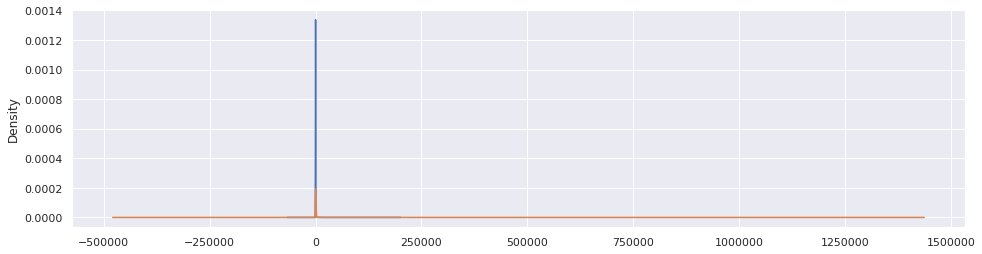

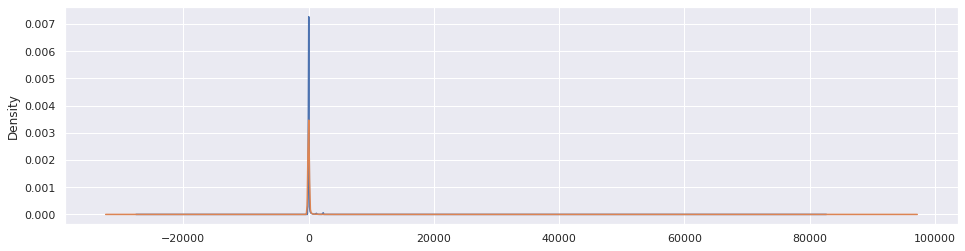

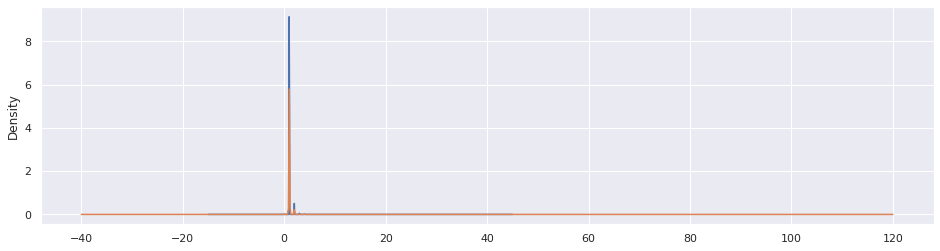

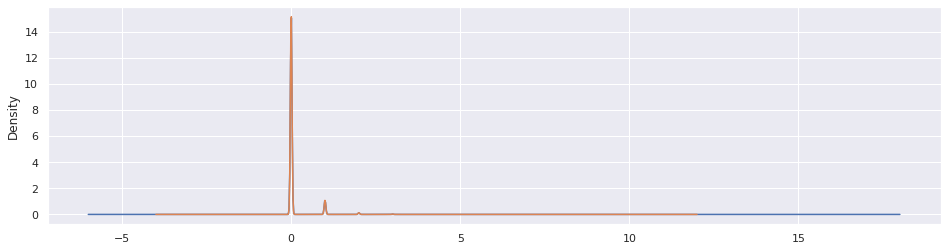

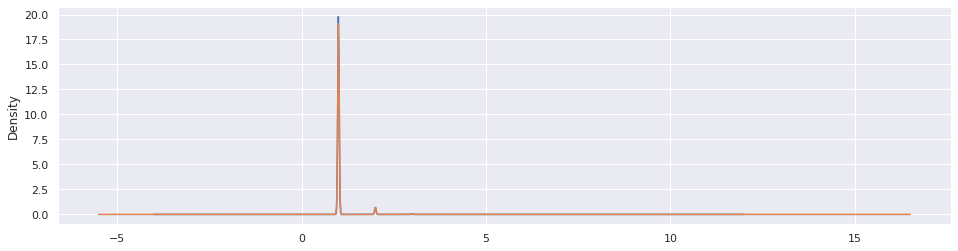

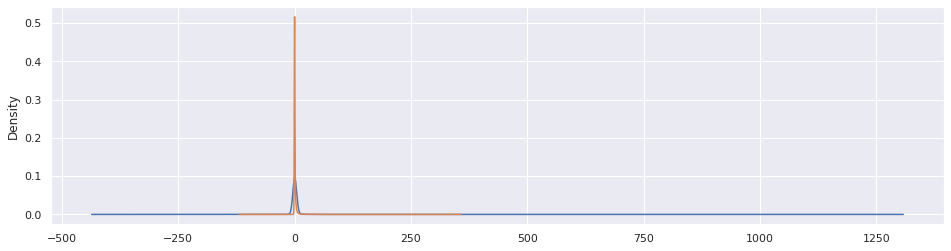

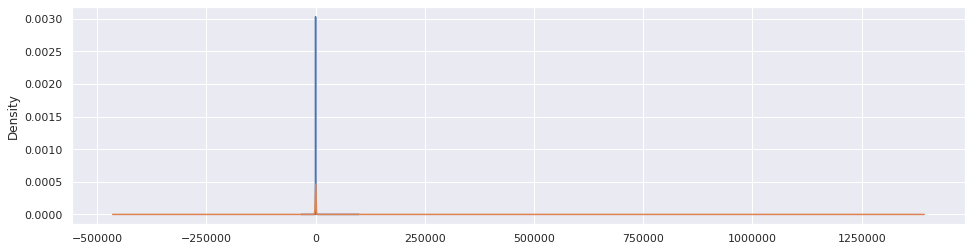

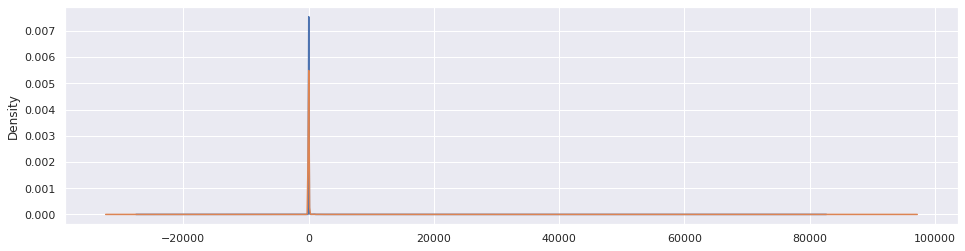

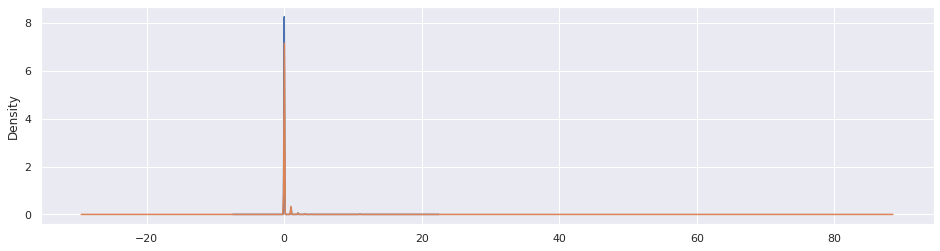

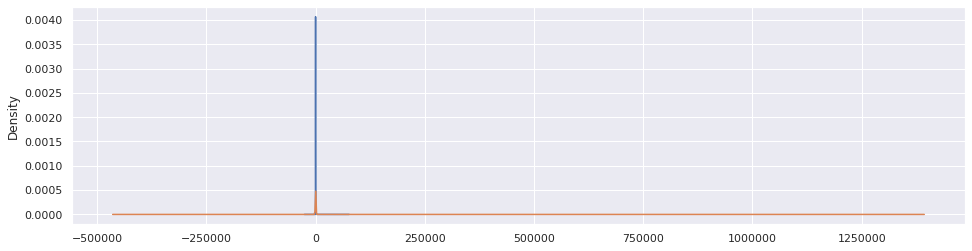

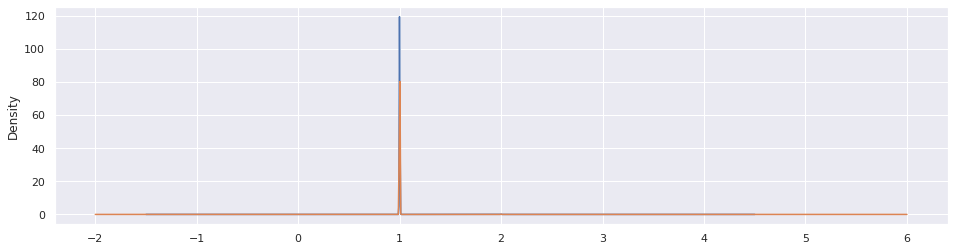

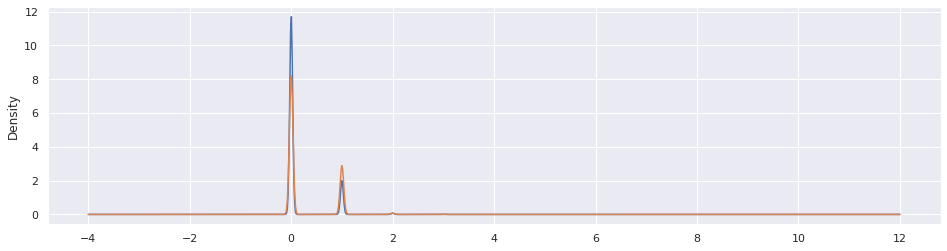

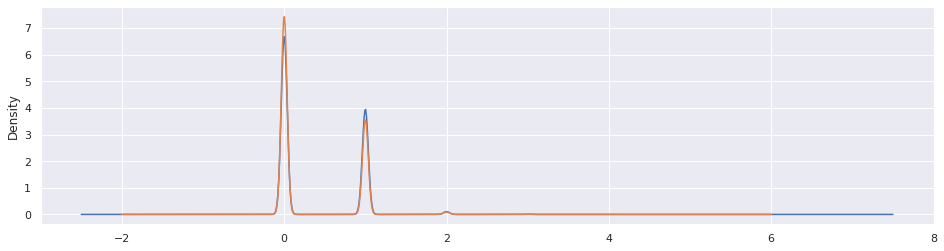

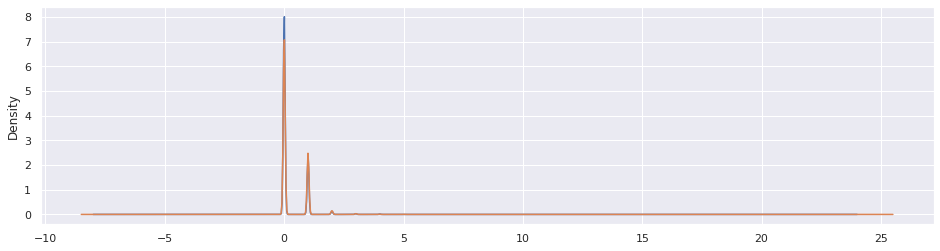

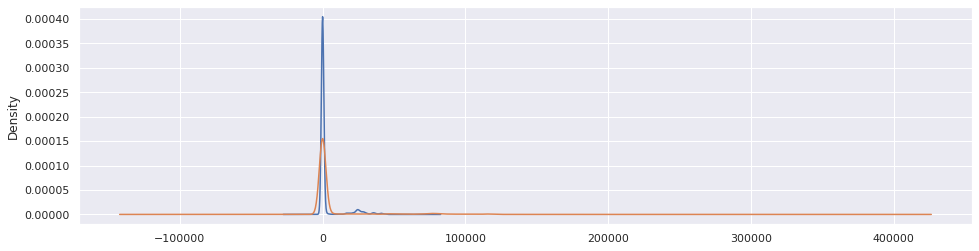

In [25]:
for feature in similar_features:
    if feature in COLUMNS_IGNORE:
        continue
        
    train_feature_path = f'../feature/raw_main/{feature}_train.gz'
    test_feature_path = f'../feature/raw_main/{feature}_test.gz'
    
    train_feature = read_pkl_gzip(train_feature_path)
    test_feature = read_pkl_gzip(test_feature_path)
    
    plt.figure(figsize=(16, 4))
    pd.Series(train_feature).plot(kind='kde')
    pd.Series(test_feature).plot(kind='kde')
#     sns.distplot(a=train_feature)
#     sns.distplot(a=test_feature)
    plt.show()